In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [4]:
data = pd.read_csv('PRSA_data.csv')

In [5]:
print('Shape of the data ', data.shape)
data.columns

Shape of the data  (43824, 13)


Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

#### Attribute Information:

    No: row number 
    year: year of data in this row 
    month: month of data in this row 
    day: day of data in this row 
    hour: hour of data in this row 
    pm2.5: PM2.5 concentration (ug/m^3) 
    DEWP: Dew Point (â„ƒ) 
    TEMP: Temperature (â„ƒ) 
    PRES: Pressure (hPa) 
    cbwd: Combined wind direction 
    Iws: Cumulated wind speed (m/s) 
    Is: Cumulated hours of snow 
    Ir: Cumulated hours of rain 



In [6]:
# Delete No because useless
data = data.iloc[:, 1:]

# Taking care of the time

Let's create a variable which contains the date and hour

In [7]:
data['date'] = pd.to_datetime((data.year*10000+data.month*100+data.day).apply(str),format='%Y%m%d')
data['day_of_the_year'] = data.month * data.day
print(data.shape)

(43824, 14)


In [8]:
data = data.drop(labels=['year', 'month','day'], axis=1)

In [9]:
data['date'] +=  pd.to_timedelta(data.hour, unit='h')
data = data.drop('hour', axis=1)
data.head(5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date,day_of_the_year
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,1
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,1
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,1
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,1
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,1


In [10]:
# Rearrange columns position
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]

In [11]:
data.head()

,date,day_of_the_year,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,1,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,1,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,1,NaN,-20,-12.0,1018.0,NW,12.97,0,0


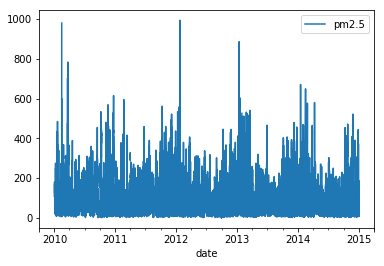

In [12]:
# Plot Is
data.plot.line(x='date', y='pm2.5')

In [13]:
data['sin_day'] = np.sin(2*np.pi*data.day_of_the_year/365)
data['cos_day'] = np.cos(2*np.pi*data.day_of_the_year/365)

In [14]:
data = data.drop(labels=['date', 'day_of_the_year'], axis=1)
data.head(5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,sin_day,cos_day
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,0.017213,0.999852
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,0.017213,0.999852
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,0.017213,0.999852
3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,0.017213,0.999852
4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,0.017213,0.999852


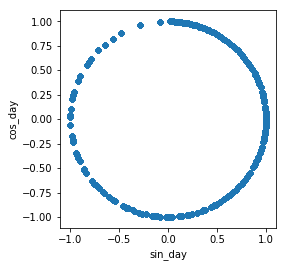

In [15]:
data.plot.scatter('sin_day','cos_day').set_aspect('equal')

## Examine Missing Value

In [16]:
def tbl_miss(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_df
missing_values = tbl_miss(data)
missing_values.head(10)

,Total,Percent
pm2.5,2067,4.716594
cos_day,0,0.000000
sin_day,0,0.000000
Ir,0,0.000000
Is,0,0.000000
Iws,0,0.000000
cbwd,0,0.000000
PRES,0,0.000000
TEMP,0,0.000000
DEWP,0,0.000000


pm2.5 is the only variable with NaN and these are only the 4.72% of the values in this column

In [17]:
# Let's fill NaNs with the mean
avg = data['pm2.5'].mean()
data = data.fillna(value=avg)

In [18]:
data.cbwd.value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

## One-Hot-Encoding

In [19]:
data = pd.get_dummies(data,prefix=['cbwd'], drop_first=True)
data.head(5)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,sin_day,cos_day,cbwd_NW,cbwd_SE,cbwd_cv
0,98.613215,-21,-11.0,1021.0,1.79,0,0,0.017213,0.999852,1,0,0
1,98.613215,-21,-12.0,1020.0,4.92,0,0,0.017213,0.999852,1,0,0
2,98.613215,-21,-11.0,1019.0,6.71,0,0,0.017213,0.999852,1,0,0
3,98.613215,-21,-14.0,1019.0,9.84,0,0,0.017213,0.999852,1,0,0
4,98.613215,-20,-12.0,1018.0,12.97,0,0,0.017213,0.999852,1,0,0


## Splitting the datasets into training sets and Test sets

In [26]:
X = data.drop(labels=['pm2.5'], axis=1).values
Y = data.iloc[ : , 0].values

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

C:\Users\DQ815GM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [23]:
print('X_train shape is: ', X_train.shape)
print('Y_train shape is: ', Y_train.shape)
print('X_test shape is: ', X_test.shape)
print('Y_test shape is: ', Y_test.shape)

X_train shape is:  (35059, 11)
Y_train shape is:  (35059,)
X_test shape is:  (8765, 11)
Y_test shape is:  (8765,)


## Keras

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

In [85]:
# Initialising the ANN
ANN = Sequential()

# Adding the input layer and the first hidden layer
ANN.add(Dense(units = 11, kernel_initializer = 'normal', activation = 'softmax', input_dim = 11))

# Adding the second hidden layer
ANN.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'softmax'))
ANN.add(Dropout(0.5))

# Adding the output layer
ANN.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'softmax'))

# Compiling the ANN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ANN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics=['accuracy'])

In [86]:
# Fitting the ANN to the Training set
ANN.fit(X_train, Y_train, batch_size = 10, epochs = 100)

Epoch 1/100
35059/35059 [==============================] - 6s 165us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 2/100
35059/35059 [==============================] - 5s 155us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 3/100
35059/35059 [==============================] - 6s 162us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 4/100
35059/35059 [==============================] - 9s 266us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 5/100
35059/35059 [==============================] - 15s 437us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 6/100
35059/35059 [==============================] - 11s 315us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 7/100
35059/35059 [==============================] - 15s 441us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 8/100
35059/35059 [==============================] - 13s 382us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch 9/100
35059/35059 [==============================] - 20s 564us/step - loss: 17578.7617 - acc: 1.4262e-04
Epoch

In [88]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = ANN.predict(X_test)

## TensorFlow

In [24]:
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [25]:
print('X_train shape is: ', X_train.shape)
print('Y_train shape is: ', Y_train.shape)
print('X_test shape is: ', X_test.shape)
print('Y_test shape is: ', Y_test.shape)

X_train shape is:  (35059, 11)
Y_train shape is:  (35059, 1)
X_test shape is:  (8765, 11)
Y_test shape is:  (8765, 1)


In [63]:
INPUT_DIMENSION  = 11
OUTPUT_DIMENSION = 1
N_EPOCHS         = 1000
BATCH_SIZE       = 32 #Mini Batch Gradient Descent
display_step     = 50
LEARNING_RATE    = 0.5

In [64]:
x = tf.placeholder(tf.float64, [None, INPUT_DIMENSION])
y_expected = tf.placeholder(tf.float64, [None, OUTPUT_DIMENSION])

In [65]:
W = tf.Variable(tf.random_normal([INPUT_DIMENSION, OUTPUT_DIMENSION], mean=0, stddev=10))
b = tf.Variable(tf.zeros([OUTPUT_DIMENSION]))
W = tf.cast(W, tf.float64)
b = tf.cast(b, tf.float64)

In [66]:
# Here we define our model which utilizes the softmax regression.
y = tf.nn.softmax(tf.matmul(x, W) + b)
y = tf.cast(y, tf.float64)

In [67]:
# MSE loss function
loss = tf.losses.mean_squared_error(y_expected, y)

In [68]:
# Define our optimizer.
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [69]:
# Define accuracy.
accuracy = tf.reduce_mean(y_expected - y)

In [70]:
init = tf.global_variables_initializer()

In [77]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Do the training
    for epoch in range(150):
        for i in range(50):
            sess.run(train_step, feed_dict={x: X_train,
                                            y_expected: Y_train})
            c = sess.run(loss, feed_dict={x: X_train,
                                          y_expected: Y_train})
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.2f}".format(c),
                  "W=", sess.run(W), "b=", sess.run(b))
            
    # predict output of test data after training        
    pred = sess.run(y, feed_dict={x: X_test})
    
    # See how model did.
    print("Test Accuracy %g" % sess.run(accuracy, feed_dict={x: X_test,
                                                             y_expected: Y_test}))

Epoch: 0050 cost= 17578.34 W= [[  0.38021907]
 [  4.31197596]
 [ -7.84288025]
 [ -9.85824394]
 [  3.54856586]
 [ 18.21729088]
 [  7.15040112]
 [ 11.63804817]
 [-17.74384499]
 [ 13.4793148 ]
 [  9.04172993]] b= [0.]
Epoch: 0100 cost= 17578.34 W= [[  0.38021907]
 [  4.31197596]
 [ -7.84288025]
 [ -9.85824394]
 [  3.54856586]
 [ 18.21729088]
 [  7.15040112]
 [ 11.63804817]
 [-17.74384499]
 [ 13.4793148 ]
 [  9.04172993]] b= [0.]
Epoch: 0150 cost= 17578.34 W= [[  0.38021907]
 [  4.31197596]
 [ -7.84288025]
 [ -9.85824394]
 [  3.54856586]
 [ 18.21729088]
 [  7.15040112]
 [ 11.63804817]
 [-17.74384499]
 [ 13.4793148 ]
 [  9.04172993]] b= [0.]
Test Accuracy 96.6946
